# Jinlun Zhang 20055835
# Wenqi Tang 20093622
# Eissa Khan 20082302

In [ ]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# As we can see below, we have negative Quantity sale and negative Unitprice, which is unrealistic, so we will do some data cleaning later
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


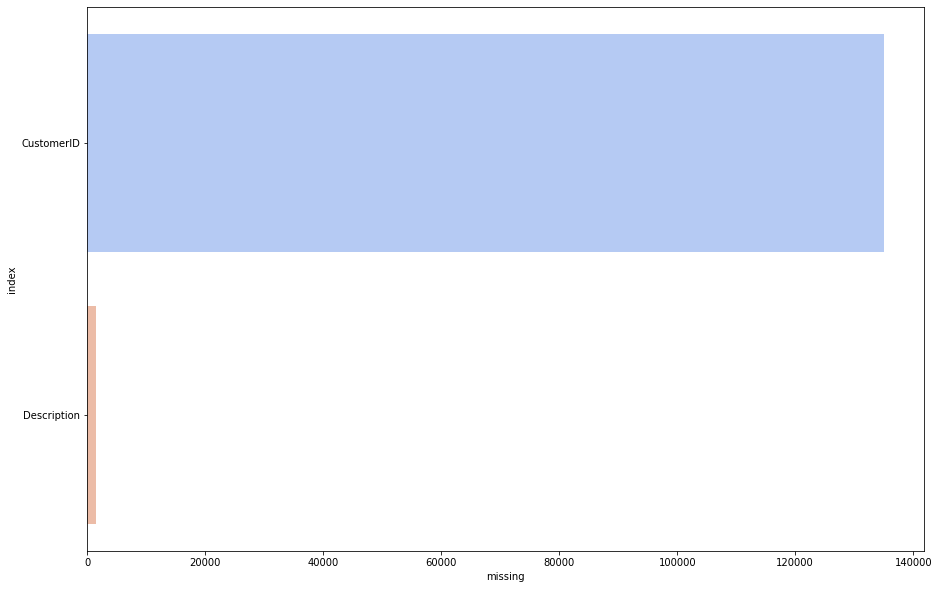

In [ ]:
# Plot the missing value count as a bar chart
missing = df.isnull().sum()
missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()


miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='coolwarm')

# Missing Data Handling & Data Cleaning

In [ ]:
# simply drop the Missing Customer ID records as we should not assign this unknown customer order to any other existing customer 
df = df.dropna(subset=['CustomerID'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# remove possible duplicate records (records that have all features values being the same) in the dataset
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Remove records that have 'Quantity' or 'UnitPrice' feature value being negative (as it does not make sense to consider negative quantity sales as valid data records)
# On further analysis, we can see from the 'InvoiceNo' feature that every entry starting from 'C' means cancellation orders so, the quantity is returned to the store.
# Since the number of cancellations compared to the total number of transaction records is small, we can just drop these cancellation order records.


df = df.drop(df.loc[df["Quantity"] < 0].index, axis=0)
df = df.drop(df.loc[df["UnitPrice"] < 0].index, axis=0) 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# We decide to drop the description column as it can be used in text analysis for better learning result
df.drop(['Description'], axis = 1,inplace=True)
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data Visualization

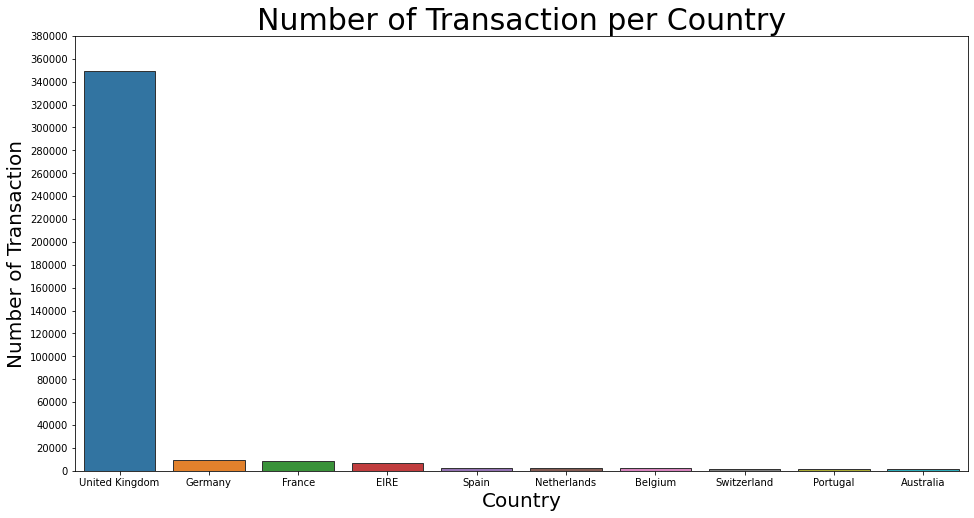

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

country_data = df.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("dark")
sns.barplot(data=country_data[0:10], x='Country', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,400000,20000))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of Transaction', size=20)
axes.set_title('Number of Transaction per Country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

In [ ]:
# feature argumentation
df['sales'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


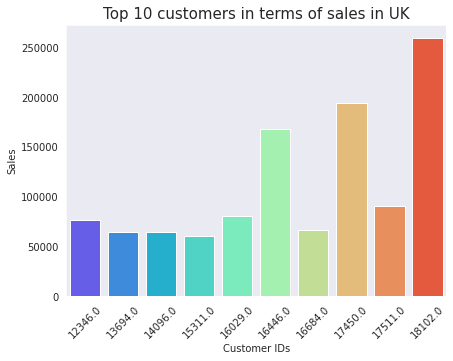

In [ ]:
# Visualize the top 10 customers who spent the most in this year

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['sales'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['sales'].sum().sort_values(ascending=False).head(10).index, 
            palette = 'rainbow'
            )
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)


plt.show()

# RFM Analysis

In [ ]:
# Get the Monetary feature (Money value for the purchases per customer)
# NOte: the summed unit price is no longer the unit price, we can drop out the 'Quantity'	and 'UnitPrice' feature to focus on the sales to see the contribution from each customer
customer_df = df.groupby('CustomerID').sum().reset_index()
customer_df.drop(columns=['Quantity', 'UnitPrice'], inplace=True)
customer_df = customer_df.rename(columns={'sales':'Monetary'})
customer_df


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [ ]:
# Get the frequency feature (Number of orders made in the study period (Count transactions per customer))
customer_df['Frequency'] = df.groupby('CustomerID')['sales'].count().values
customer_df

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4334,18280.0,180.60,10
4335,18281.0,80.82,7
4336,18282.0,178.05,12
4337,18283.0,2045.53,721


In [ ]:
import time, warnings
import datetime as dt
# We check the last date available in our dataset,
# which turns out to be the same with the last date of the study (09/12/2011)
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#create a new column called date which contains the date of invoice only
df['date'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,date
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [ ]:
#group by customers and check the last date of their purchase
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# get the month of the Last Purchase Date
recency_df['month'] = pd.DatetimeIndex(recency_df['LastPurshaceDate']).month
recency_df

,CustomerID,LastPurshaceDate,month
0,12346.0,2011-01-18,1
1,12347.0,2011-12-07,12
2,12348.0,2011-09-25,9
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4334,18280.0,2011-03-07,3
4335,18281.0,2011-06-12,6
4336,18282.0,2011-12-02,12
4337,18283.0,2011-12-06,12


In [ ]:
# Get the Recency feature and append the Recency feature to the customer data dataframe (Number of months between the last order and the last date of the study (09/12/2011). Zero means most recent.)
customer_df['Recency'] = df['InvoiceDate'].max().month - recency_df['month']
customer_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,11
1,12347.0,4310.00,182,0
2,12348.0,1797.24,31,3
3,12349.0,1757.55,73,1
4,12350.0,334.40,17,10
...,...,...,...,...
4334,18280.0,180.60,10,9
4335,18281.0,80.82,7,6
4336,18282.0,178.05,12,0
4337,18283.0,2045.53,721,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

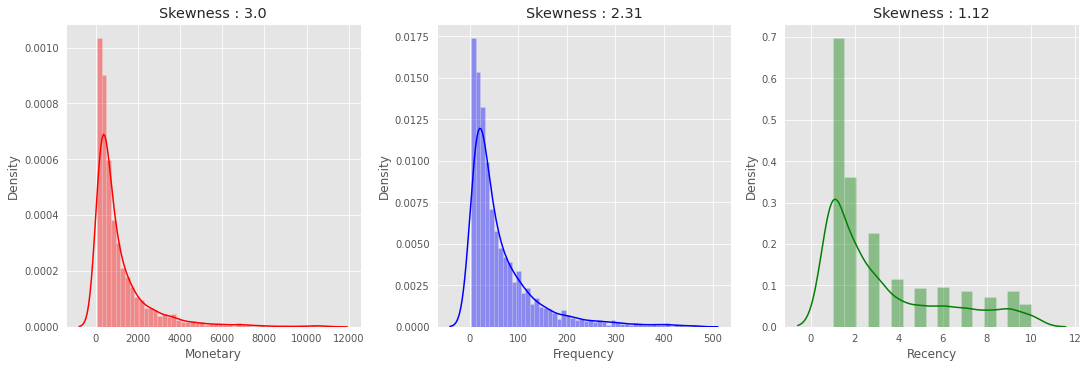

In [ ]:
# Visualizing the Recency, Frequency and Monetary distributions.
# We can see from the data that the RFM feature values are very right-skewed, indicating the existence of outliers
from matplotlib.gridspec import GridSpec
i = 0
fig = plt.figure(constrained_layout = True,figsize = (15,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(customer_df.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(customer_df[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(customer_df[var].skew(),2).astype(str))
    i= i+1

### Clustering algorithm can be sensitive to outliers or variables that are of incomparable scales or magnitudes. 
### Hence, 
### 1. Outliers should be identified and removed from the majority and treated separately.
### 2. Incomparable scales variables should be normalized before the clustering analysis.

In [ ]:
# Outlier identify
upper_frequency = customer_df['Frequency'].quantile(0.98)
lower_frequency = customer_df['Frequency'].quantile(0.02)

upper_monetary = customer_df['Monetary'].quantile(0.98)
lower_monetary = customer_df['Monetary'].quantile(0.02)

upper_recency = customer_df['Recency'].quantile(0.98)
lower_recency = customer_df['Recency'].quantile(0.02)

#remove outliers
outliers = customer_df[(customer_df["Frequency"] < lower_frequency) | (customer_df["Frequency"] > upper_frequency) &
            (customer_df["Monetary"] < lower_monetary) | (customer_df["Monetary"] > upper_monetary) &
            (customer_df["Recency"] < lower_recency) | (customer_df["Recency"] > upper_recency)]

customer_df = customer_df[(customer_df["Frequency"] > lower_frequency) & (customer_df["Frequency"] < upper_frequency) &
            (customer_df["Monetary"] > lower_monetary) & (customer_df["Monetary"] < upper_monetary) &
            (customer_df["Recency"] > lower_recency) & (customer_df["Recency"] < upper_recency)]

customer_df

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,3
3,12349.0,1757.55,73,1
4,12350.0,334.40,17,10
5,12352.0,2506.04,85,1
6,12353.0,89.00,4,7
...,...,...,...,...
4332,18277.0,110.38,8,2
4333,18278.0,173.90,9,3
4334,18280.0,180.60,10,9
4335,18281.0,80.82,7,6


In [ ]:
# To remove the right-skewness, we will apply Log Transformation to the RFM features
log_customer_df = customer_df[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)
log_customer_df

,Recency,Frequency,Monetary
2,1.0986,3.4340,7.4940
3,0.0000,4.2905,7.4717
4,2.3026,2.8332,5.8123
5,0.0000,4.4427,7.8265
6,1.9459,1.3863,4.4886
...,...,...,...
4332,0.6931,2.0794,4.7039
4333,1.0986,2.1972,5.1585
4334,2.1972,2.3026,5.1963
4335,1.7918,1.9459,4.3922


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

,Recency,Frequency,Monetary
count,3318.000000,3318.000000,3318.000000
mean,0.856097,3.643633,6.498029
std,0.792586,1.071478,1.032680
min,0.000000,1.098600,4.337300
25%,0.000000,2.890400,5.739025
50%,0.693100,3.637600,6.449950
75%,1.609400,4.439725,7.229525
max,2.302600,6.146300,9.312200


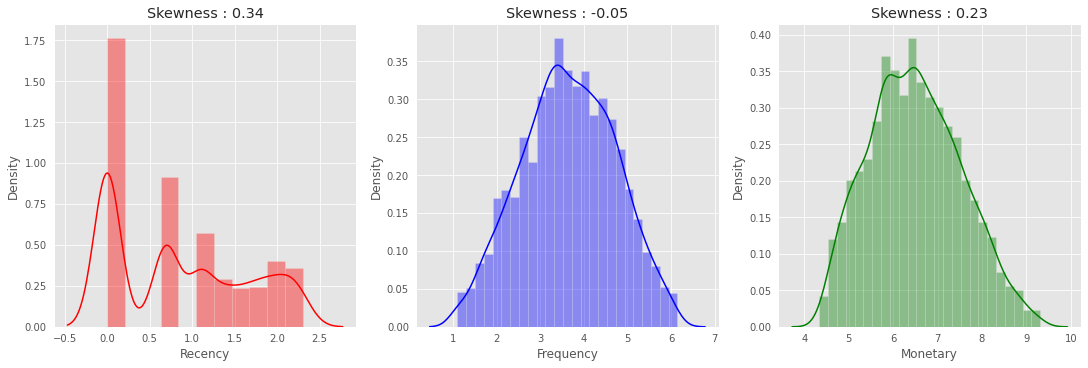

In [ ]:
#Plot the distributions after the log transformation
#we can see that the skewness has been removed:
i = 0
fig = plt.figure(constrained_layout = True,figsize = (15,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(log_customer_df.columns[0:3]):
    plt.subplot(gs[0,i])
    sns.distplot(log_customer_df[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(log_customer_df[var].skew(),2).astype(str))
    i= i+1
log_customer_df.describe()

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
scaled_data = standardizer.fit_transform(log_customer_df)
scaled_customer_df = pd.DataFrame(scaled_data,columns=log_customer_df.columns,index=log_customer_df.index)
scaled_customer_df

,Recency,Frequency,Monetary
2,0.306010,-0.195678,0.964598
3,-1.080295,0.603806,0.943000
4,1.825318,-0.756483,-0.664128
5,-1.080295,0.745875,1.286624
6,1.375204,-2.107065,-1.946132
...,...,...,...
4332,-0.205683,-1.460104,-1.737614
4333,0.306010,-1.350145,-1.297334
4334,1.692316,-1.251762,-1.260724
4335,1.180748,-1.584717,-2.039495


Text(0.5, 0.92, '3D Customer Data Visualization')

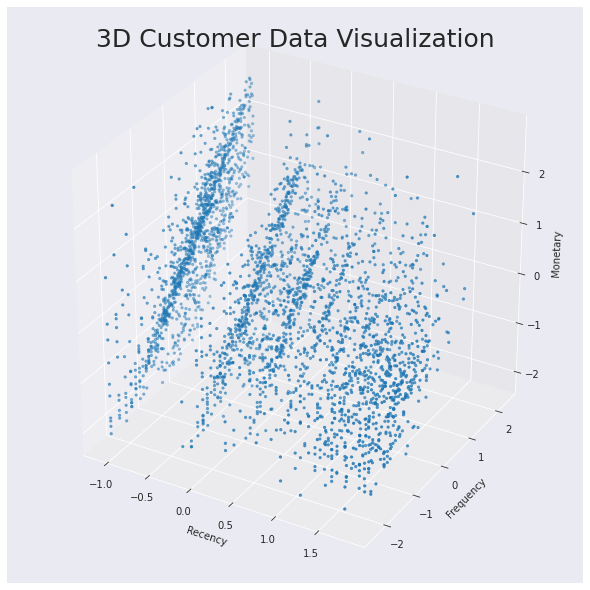

In [ ]:
# plot the standardized customer data points in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = scaled_customer_df['Recency']
y = scaled_customer_df['Frequency']
z = scaled_customer_df['Monetary']
ax.scatter(x, y, z, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("3D Customer Data Visualization", size=25)

# Model Training
Since our dataset is large, Hierarchical clustering algorithm may not give a good clustering result, and so we will use the K-Means clustering algorithm instead, and identify the optimal number of clusters by using the the Elbow method and the Silhouette analysis.

In [ ]:
from sklearn.cluster import KMeans

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_customer_df)
    ssd.append(model_clus.inertia_)

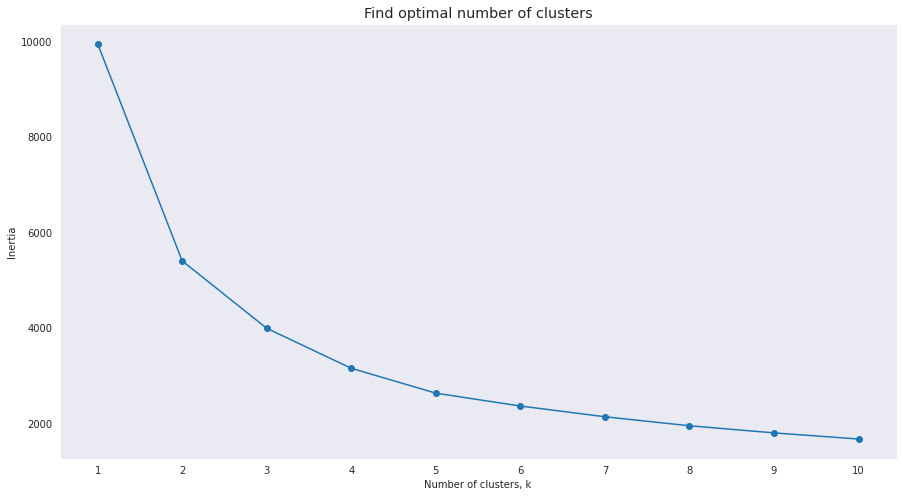

In [ ]:
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(np.arange(1,11,1), ssd, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.style.use('ggplot')
plt.title('Find optimal number of clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score 

# compute the silhouette_score for each value of the hyper-parameter k, and k must be > 1

for n_clusters in range(2,11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    kmean = KMeans(n_clusters=n_clusters, random_state=1, max_iter=50)
    cluster_labels = kmean.fit_predict(scaled_customer_df)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(scaled_customer_df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.38039012985520076
For n_clusters = 3 The average silhouette_score is : 0.34768928694977885
For n_clusters = 4 The average silhouette_score is : 0.34012359711699186
For n_clusters = 5 The average silhouette_score is : 0.31525224718455985
For n_clusters = 6 The average silhouette_score is : 0.2962696632591234
For n_clusters = 7 The average silhouette_score is : 0.3026862030424358
For n_clusters = 8 The average silhouette_score is : 0.2868085552298602
For n_clusters = 9 The average silhouette_score is : 0.2953982857131301
For n_clusters = 10 The average silhouette_score is : 0.30203458043611453


### From observing above graph (Elbow Method) and the inspecting the Silhouette scores, we know that when k > 3, the rate of decreasing of the Sum-of-Squared-Error curve is low (elbow of the curve at k = 3), and the Silhouette score (a score closer to 1 indicating that the data point is very similar to the other data points in the same cluster) is high and stable when k = 3

#### Hence, we will use kmean model to categorize the data into 3 clusters and check their RFM values and its distribution.

In [ ]:
kmean = KMeans(n_clusters=3, random_state=1, max_iter =50)
cluster_labels = kmean.fit_predict(scaled_customer_df)
cluster_labels

array([2, 2, 0, ..., 0, 0, 2], dtype=int32)

# Model Evaluation


In [ ]:
# Calculate Error 

#BetaCV implementation from https://github.com/hayashikan/betacv

from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances
from math import ceil
import numpy as np
import time

def betacv(data, labels, metric='euclidean'): # data = principals2Df, labels = kmeansModel.labels_ 
    distances = pairwise_distances(data, metric=metric) # pairwise distance between every 2 points in the training set
    # so distance is a 802*802 square matrix for # of training samples = 802
    n = labels.shape[0] # so n = # of training samples
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)]) # distances[i] = array of distances of the i-th training sample to the rest of all samples
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A) # total intra-distance
    b = np.sum(B) # total inter-distance
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq]) # get the # of samples for each predicted cluster, the index of the # of samples refers to the cluster 
    N_in = np.array([i*(i-1) / 2 for i in members]) # each element in the array is the # of intra-distance between any 2 points in a cluster (n chooose 2)
    n_in = np.sum(N_in)  # get the total # of intra-distance 
    
    # compute the # of inter-distance for each cluster
    N_out = np.array([])
    for i in range(len(members)-1):
      j = i+1 
      while(j < len(members)):
        N_out = np.append(N_out, members[i]*members[j] ) 
        j += 1
    
    # The following can gives the same total # of inter-distance:
    #N_out = np.array([i*(n-i) for i in members])
    #n_out = np.sum(N_out) / 2 

    n_out = np.sum(N_out) # get the total # of inter-distance without double accounting
    betacv = (a/n_in)/(b/n_out)
    #print('intra:', a)
    #print('inter:', b)
    #print('n_in :', n_in)
    #print('n_out:', n_out)
    return betacv

def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i] # array of Ture/False that yields true for the current samples label = the label in the array of labels
    mask[i] = False       # we do not account the distance from itself to itself
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask]) # for the current data point x, we sum up the distance from x to all the other points that shares the same label with x
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask]) # for the current data point x, we sum up the distance from x to all the other points that DO NOT share the same label with x
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

In [ ]:
# The beta CV is 0.5397, which does not show a good clustering performance (implying having high intra-distance within a cluster or low inter-distance between clusters)
kmeans3ClustersScore = betacv(scaled_customer_df,cluster_labels )
kmeans3ClustersScore

0.539727087509155

In [ ]:
cluster_labels

array([2, 2, 0, ..., 0, 0, 2], dtype=int32)

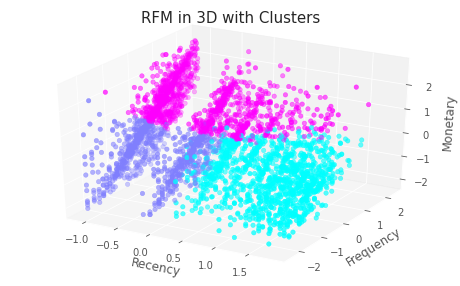

In [ ]:
import matplotlib.cm as cm
# Data points in 3D space
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(scaled_customer_df.Recency, scaled_customer_df.Frequency, scaled_customer_df.Monetary, c=cluster_labels, cmap='cool')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

# Get the statistics of each cluster 

In [ ]:
scaled_customer_df['Cluster'] = cluster_labels
scaled_customer_df['Cluster'] = 'Cluster ' + scaled_customer_df['Cluster'].astype(str)
scaled_customer_df

,Recency,Frequency,Monetary,Cluster
2,0.306010,-0.195678,0.964598,Cluster 2
3,-1.080295,0.603806,0.943000,Cluster 2
4,1.825318,-0.756483,-0.664128,Cluster 0
5,-1.080295,0.745875,1.286624,Cluster 2
6,1.375204,-2.107065,-1.946132,Cluster 0
...,...,...,...,...
4332,-0.205683,-1.460104,-1.737614,Cluster 1
4333,0.306010,-1.350145,-1.297334,Cluster 0
4334,1.692316,-1.251762,-1.260724,Cluster 0
4335,1.180748,-1.584717,-2.039495,Cluster 0


In [ ]:
# Get the distribution of the customers within each cluster (Ratio & Percentage of customers per cluster divided by the total number of customers)
cluster_data = scaled_customer_df.groupby('Cluster')
cluster_distribution = cluster_data.count() / scaled_customer_df.shape[0]
cluster_distribution

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,0.355335,0.355335,0.355335
Cluster 1,0.262206,0.262206,0.262206
Cluster 2,0.382459,0.382459,0.382459


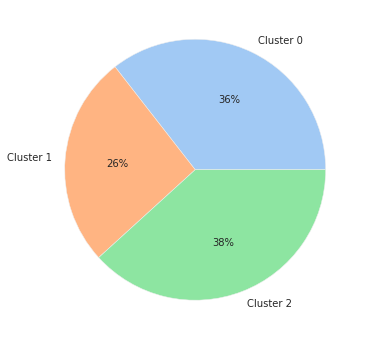

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(9, 6))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(cluster_distribution['Frequency'], labels = cluster_distribution.reset_index()['Cluster'], colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# calculate mean of each feature for clusters
cluster_mean = cluster_data.mean()
cluster_mean

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,1.095005,-0.639905,-0.597225
Cluster 1,-0.727434,-0.508367,-0.596871
Cluster 2,-0.518631,0.943047,0.964070


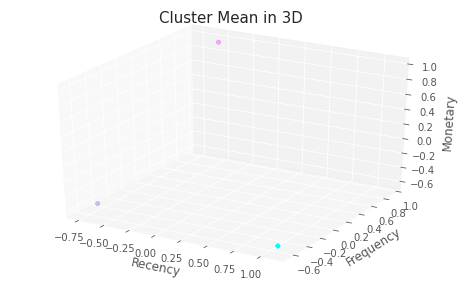

In [ ]:
# visualize the mean of cluster
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(cluster_mean.Recency, cluster_mean.Frequency, cluster_mean.Monetary, c=[0,1,2], cmap='cool')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Cluster Mean in 3D', size=15)
ax.set(facecolor='white')
plt.show()

In [ ]:
# calculate mean of each feature for clusters
cluster_median = cluster_data.median()
cluster_median

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,1.180748,-0.559249,-0.610377
Cluster 1,-1.080295,-0.396459,-0.548780
Cluster 2,-1.080295,0.916039,0.892832


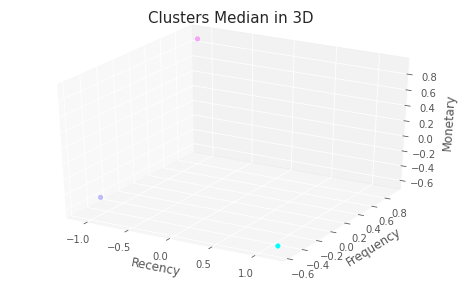

In [ ]:
# visualize the median of cluster
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(cluster_median.Recency, cluster_median.Frequency, cluster_median.Monetary, c=[0,1,2], cmap='cool')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Clusters Median in 3D', size=15)
ax.set(facecolor='white')
plt.show()

In [ ]:
# calculate min of each feature for clusters
cluster_min = cluster_data.min()
cluster_min

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,0.306010,-2.375613,-2.092666
Cluster 1,-1.080295,-2.375613,-2.088888
Cluster 2,-1.080295,-1.584717,-0.478467


In [ ]:
# calculate max of each feature for clusters
cluster_max = cluster_data.max()
cluster_max

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,1.825318,1.275970,1.692813
Cluster 1,-0.205683,1.019837,2.246020
Cluster 2,1.825318,2.336068,2.725524


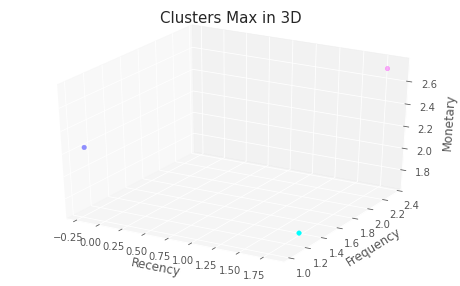

In [ ]:
# visualize the max of cluster
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(cluster_max.Recency, cluster_max.Frequency, cluster_max.Monetary, c=[0,1,2], cmap='cool')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Clusters Max in 3D', size=15)
ax.set(facecolor='white')
plt.show()

# Conclusion:
## Cluster 2 should be the profitable cluster of customers, due to its relatively higher frequency, monetary, and lower recency comparing to the other 2 clusters by inspecting both of the median and mean measure of the RFM attributes